In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras. models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

landmark = "lunge_landmark_list.csv"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras. models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

landmark = "lunge_landmark_list.csv"

In [2]:
val_data = pd.read_csv("lunge_landmark.csv",header=None)
predict_val = []
predict_val = val_data.iloc[:,1:-1].values

predict_val = np.array(predict_val)
print(predict_val)

[[ 0.34668088  0.32921836  0.00485982  0.81586796  0.35433948  0.31588262
  -0.01566947  0.83458245  0.35574377  0.31611666 -0.01568459  0.84323299
   0.35721448  0.31634027 -0.01570542  0.83448738  0.35420859  0.31533322
   0.02201822  0.82597166  0.35550424  0.31518123  0.02206702  0.82831645
   0.35685593  0.3149035   0.02212596  0.82228798  0.37118307  0.32504612
  -0.07556961  0.83704758  0.37013787  0.32177234  0.09605567  0.84069562
   0.35157266  0.34514117 -0.01688308  0.85021776  0.35065711  0.34486061
   0.03236733  0.84272987  0.38681865  0.41031528 -0.16323578  0.86958516
   0.38960579  0.39960745  0.18925364  0.88850754  0.41447806  0.60282779
  -0.09996795  0.77984411  0.39854395  0.59930474  0.09986413  0.77953941
   0.52291083  0.69609636 -0.20515017  0.70361382  0.2928957   0.61001098
   0.08089     0.71556175  0.63607919  0.77159393 -0.21549103  0.7190097
   0.29952273  0.77669728  0.11607935  0.69465172  0.65995848  0.77579927
  -0.21665649  0.71134496  0.31450325  

In [3]:
lunge_data = pd.read_csv(landmark, header=None)

X = []
y = []

X = lunge_data.iloc[:,1:-1].values
print (X[0])
y = lunge_data.iloc[:,-1].values
print (y[0])
    
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

[ 0.40194076  0.33393312 -0.13601847  0.74734479  0.41919982  0.31996542
 -0.16840395  0.77305055  0.42272061  0.32027501 -0.1683505   0.78490859
  0.42605343  0.32060248 -0.16835988  0.77291518  0.41943327  0.31866401
 -0.09823107  0.76121753  0.42296043  0.31822973 -0.09815498  0.76437843
  0.4262937   0.31773436 -0.09822591  0.75611573  0.45860475  0.32653132
 -0.27514914  0.77641994  0.45384064  0.32286662  0.055465    0.78141594
  0.41489536  0.34611762 -0.17283009  0.79423821  0.41296837  0.34472665
 -0.07793105  0.78382212  0.51176745  0.39594656 -0.44987121  0.820526
  0.45525628  0.38703406  0.16695996  0.84672314  0.51330525  0.637793
 -0.18129471  0.6978699   0.41127402  0.62975651  0.18091886  0.69764775
  0.70678967  0.75225955 -0.23058493  0.59346741  0.16740066  0.67898726
 -0.10641927  0.61728048  0.90645015  0.83872271  0.05114789  0.61414456
  0.16688615  0.83916909  0.09128548  0.58564365  0.92788547  0.84300661
  0.07047405  0.6024279   0.19456562  0.87317502  0.098

In [4]:
#shuffle and split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [5]:
#build model
model = Sequential()
model.add(InputLayer(shape=(92,)))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,512 (9.81 KB)

 Trainable params: 2,512 (9.81 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#define callback and start training
es_callback = EarlyStopping(monitor="val_loss", 
                            verbose=1, 
                            mode="min", 
                            patience=25)

history=model.fit(X_train, y_train, 
                  epochs=500, 
                  batch_size=32, 
                  validation_data=(X_test, y_test), 
                  verbose=1, 
                  callbacks=[es_callback])

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5268 - loss: 0.7351 - val_accuracy: 0.5075 - val_loss: 0.6704
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5511 - loss: 0.6707 - val_accuracy: 0.6169 - val_loss: 0.6295
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.6306 - val_accuracy: 0.7114 - val_loss: 0.5862
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7646 - loss: 0.5771 - val_accuracy: 0.8159 - val_loss: 0.5349
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.5216 - val_accuracy: 0.7960 - val_loss: 0.4773
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4697 - val_accuracy: 0.8109 - val_loss: 0.4840
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 0.4722 - val_accuracy: 0.8109 - val_loss: 0.4078
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4353 - val_accuracy: 0.8259 - 

In [7]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8939 - loss: 0.2862 


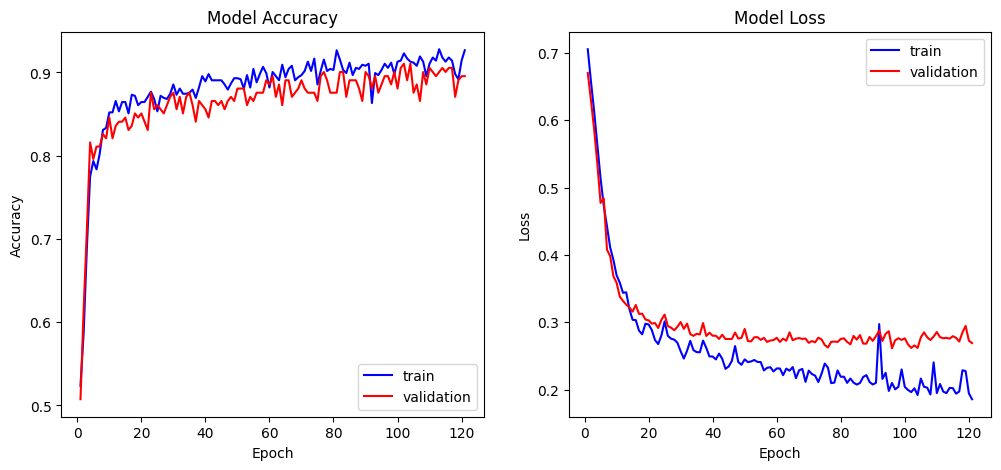

In [8]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    
    # plt.savefig("graph/HandPostureModelTrainingHistory1.png")
    
plot_history(history)

In [9]:

res = model.predict(np.array([predict_val[0]]))
print(np.squeeze(res))
print(np.argmax(np.squeeze(res)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[9.9968255e-01 3.1744523e-04]
0


In [10]:
model.save('proto_model_test.h5')